In [10]:
from utils import load_data, visualize_point
import numpy as np
import pickle
import re
import click
from systems.acrobot import Acrobot
from matplotlib import pyplot as plt

In [11]:
from utils import load_data
env_id = 0
system = 'acrobot_obs'
traj_id = 0
path_dict = load_data(system, env_id, traj_id)
path_dict['path'],path_dict['start_goal']

(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.24618453, -0.5358435 ,  1.08646313, -2.47822479],
        [ 0.024715  , -0.46927478, -1.58452605,  2.52628692],
        [-0.89120884,  1.50734784, -0.36267027,  2.50518148],
        [ 1.05585886, -2.64572119, -3.89214283,  0.58986767],
        [-1.191028  , -1.44055217, -2.0169284 ,  1.68025333],
        [-1.38639485, -1.25818887, -1.07401745,  1.24162405],
        [ 1.62689883,  2.45531076,  3.54976229, -3.01216104],
        [ 2.44559427,  1.63520854,  0.60899786, -0.75361788]]),
 [array([0., 0., 0., 0.]),
  array([2.50724579, 1.50927706, 0.        , 0.        ])])

In [93]:
setup = 'default'
# setup = 'norm_nodiff_noaug_20step2e-2'

data_fn = 'acrobot_obs_path_data.npy'
gt_fn = 'acrobot_obs_gt.npy'

data = np.load('{}/{}'.format(setup, data_fn))[:, 1:]
gt = np.load('{}/{}'.format(setup, gt_fn))

start_id = 0
end_id = 9
# start_id = 9
# end_id = 18
data[start_id:end_id, :4], gt[start_id:end_id]

(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.24618453, -0.5358435 ,  1.08646313, -2.47822479],
        [ 0.024715  , -0.46927478, -1.58452605,  2.52628692],
        [-0.89120884,  1.50734784, -0.36267027,  2.50518148],
        [ 1.05585886, -2.64572119, -3.89214283,  0.58986767],
        [-1.191028  , -1.44055217, -2.0169284 ,  1.68025333],
        [-1.38639485, -1.25818887, -1.07401745,  1.24162405],
        [ 1.62689883,  2.45531076,  3.54976229, -3.01216104],
        [ 2.44559427,  1.63520854,  0.60899786, -0.75361788]]),
 array([[ 0.24618453, -0.5358435 ,  1.08646313, -2.47822479],
        [ 0.024715  , -0.46927478, -1.58452605,  2.52628692],
        [-0.89120884,  1.50734784, -0.36267027,  2.50518148],
        [ 1.05585886, -2.64572119, -3.89214283,  0.58986767],
        [-1.191028  , -1.44055217, -2.0169284 ,  1.68025333],
        [-1.38639485, -1.25818887, -1.07401745,  1.24162405],
        [ 1.62689883,  2.45531076,  3.54976229, -3.01216104],
      

<IPython.core.display.Javascript object>


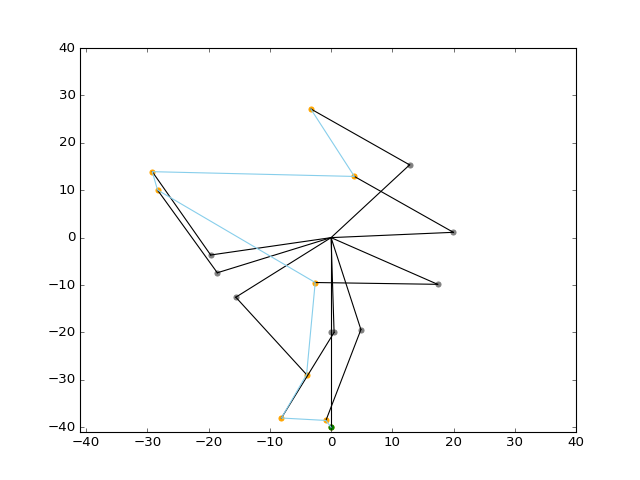

(-41, 40)

In [94]:
%matplotlib notebook
datas = data[start_id:end_id, :4]#*np.array([np.pi, np.pi, 6, 6])
gts = gt[start_id:end_id]#*np.array([np.pi, np.pi, 6, 6])
endeff = []
node1 = []
for i in range(gts.shape[0]):
    ex1, ey1, ex2, ey2 = visualize_point(datas[i, :4])#gts[i, :])
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='black')
    plt.plot([ex1, ex2], [ey1, ey2], color='black')

    
endeff = np.array(endeff)
node1 = np.array(node1)
plt.plot(endeff[:,0], endeff[:,1], color='skyblue')

plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.xlim(-41, 40)
plt.ylim(-41, 40)


In [79]:
gt.std(axis=0)

array([0.43221765, 0.55450666, 0.39171543, 0.45286436])

In [80]:
data[:,].std(axis=0)

array([0.37824269, 0.54871857, 0.39171543, 0.45286436, 0.77439423,
       0.33954737, 0.        , 0.        ])

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


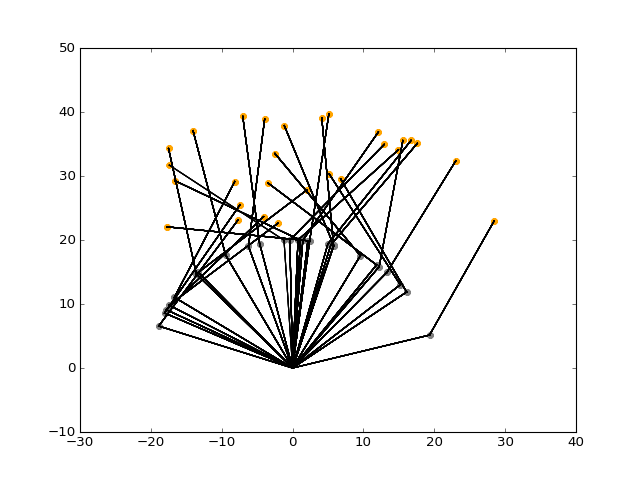

In [83]:
%matplotlib 

d = data[:500, 4:]
endeff = []
node1 = []
for i in range(d.shape[0]):
    ex1, ey1, ex2, ey2 = visualize_point(d[i, :4] * np.array([np.pi, np.pi, 6,6]))#gts[i, :]
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='black')
    plt.plot([ex1, ex2], [ey1, ey2], color='black')


<IPython.core.display.Javascript object>


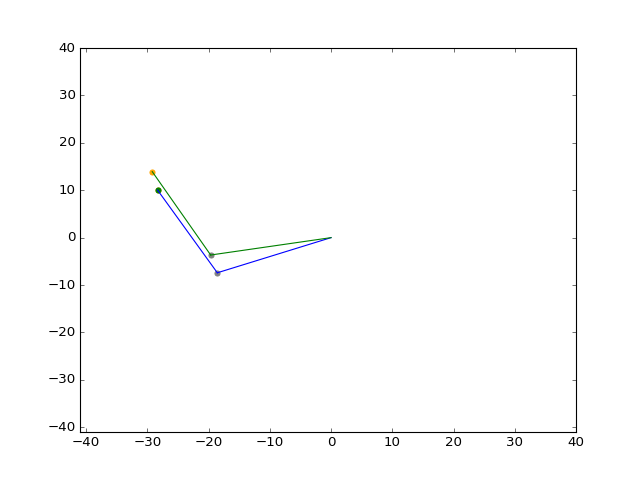

(-41, 40)

In [89]:
%matplotlib notebook
node_id = 11

datas = data[node_id:node_id+1, :4]*np.array([np.pi, np.pi, 6, 6])
gts = gt[node_id:node_id+1]*np.array([np.pi, np.pi, 6, 6])
endeff = []
node1 = []
for i in range(gts.shape[0]):
    ex1, ey1, ex2, ey2 = visualize_point(datas[i, :4])#gts[i, :])
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='blue')
    plt.plot([ex1, ex2], [ey1, ey2], color='blue')
    
    ex1, ey1, ex2, ey2 = visualize_point(gts[i, :])#
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='green')
    plt.plot([ex1, ex2], [ey1, ey2], color='green')

    
endeff = np.array(endeff)
node1 = np.array(node1)
plt.plot(endeff[:,0], endeff[:,1], color='skyblue')

plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.xlim(-41, 40)
plt.ylim(-41, 40)


In [8]:
data[node_id:node_id+1, :4],gt[node_id:node_id+1]

(array([[0., 0., 0., 0.]]),
 array([[ 0.07836297, -0.17056428,  0.18107719, -0.41303746]]))

## Topology

In [28]:
env_id = 0
system = 'acrobot_obs'
traj_id = 1
path_dict = load_data(system, env_id, traj_id)
path_dict['path'],path_dict['start_goal']
def interpolate_path(path_dict, dynamics=Acrobot(), interval_steps=5, step_size=2e-2):
    ref_path = path_dict['path']
    ref_control = path_dict['control']
    ref_time = path_dict['cost']
    state = ref_path[0].copy()
    waypoints = [state].copy()

    for k in range(len(ref_control)):
        max_steps = int(np.round(ref_time[k]/step_size))
        #print(state, ref_path[k])
        state = ref_path[k].copy()
        waypoints[-1] = ref_path[k]
        for step in range(1, max_steps+1):
            state = dynamics.propagate(state.copy(), [ref_control[k]], 1, step_size).copy()
            if (step % interval_steps == 0) or (step == max_steps):
                waypoints.append(state.copy())
                #print(step, state)
    waypoints[-1] = ref_path[-1].copy()
    #print(waypoints[-1], ref_path[-1])
    waypoints = np.array(waypoints)
    #print(waypoints.shape)
    #print(waypoints) 
    return waypoints

waypoints = interpolate_path(path_dict)

<IPython.core.display.Javascript object>


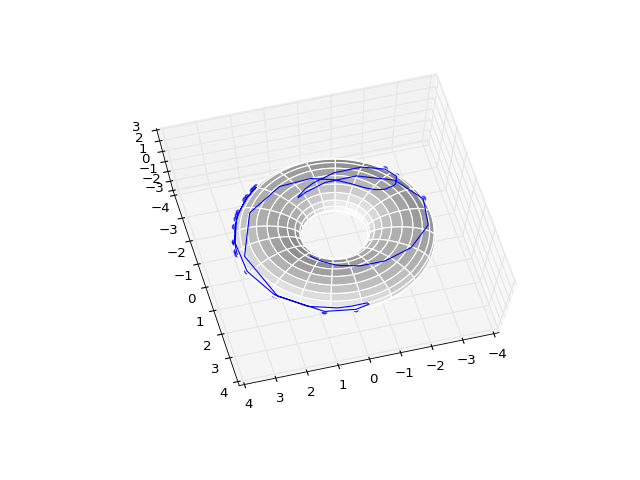

In [29]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_zlim(-3,3)
ax1.plot_surface(x, y, z, rstride=5, cstride=5, color='white', edgecolors='w')
# ax1.view_init(36, 26)

path_x = (c + a*np.cos(waypoints[:, 0])) * np.cos(waypoints[:, 1])
path_y = (c + a*np.cos(waypoints[:, 0])) * np.sin(waypoints[:, 1])
path_z = a * np.sin(waypoints[:, 0])

ax1.scatter(path_x, path_y, path_z, color='blue')
ax1.plot(path_x, path_y, path_z, color='blue')
